torch.Size([1, 12288])
tensor([[0.7205]])


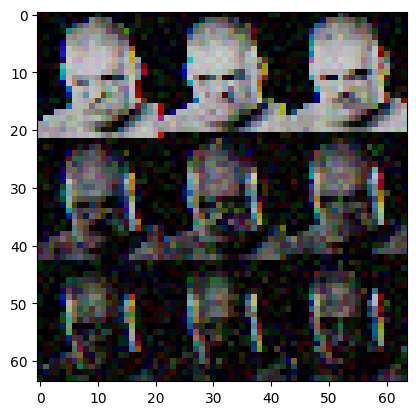

In [6]:
from torch_snippets import *
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from glob import glob
import torch,torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
from torch import optim
import warnings
warnings.simplefilter('ignore')
device='cuda' if torch.cuda.is_available() else 'cpu'


class generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(100,256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,512),
            nn.LeakyReLU(0.2),
            nn.Linear(512,3*64*64),
            nn.Tanh()
        )
    def forward(self,x):
        return self.model(x)


class discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(nn.Linear(3*64*64,512),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3),
                                nn.Linear(512,256),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.2),
                                nn.Linear(256,1),
                                nn.Sigmoid()
                                )
    def forward(self,x):
        return self.model(x)

state_dic=torch.load('GAN_brain_tumor.pth')
dis=discriminator().to(device)
gen=generator().to(device)
loss=nn.BCELoss()
optim_d=torch.optim.Adam(dis.parameters(),lr=0.0002)
optim_g=optim.Adam(gen.parameters(),lr=0.0002)
dis.load_state_dict(state_dic['dis'])
gen.load_state_dict(state_dic['gen'])
optim_d.load_state_dict(state_dic['optim_d'])
optim_g.load_state_dict(state_dic['optim_g'])
dis.eval()
gen.eval()
with torch.no_grad():
    z=torch.randn(1,100)
    fake_im=gen(z)
    fake_im=fake_im.clamp(0,1)
    plt.imshow(fake_im.view(64,64,3))
    fake_im=fake_im.view(1,-1)
    print(fake_im.size())
    pred_f=dis(fake_im.view(1,-1))
    #pred=dis(img.view(1,-1))
    print(pred_f)
    
    
    
    